In [1]:
import numpy as np 
import pandas as pd 
import sklearn

import os
for dirname, _, filenames in os.walk('/kaggle/input/spamassassin'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spamassassin/Spam_data.csv


In [2]:
data = pd.read_csv(os.path.join(dirname, filename))
data.head()

,email,label,Subject,content
0,"b""From fork-admin@xent.com Tue Sep 17 18:42:3...",0.0,hanson' sept number messag nation review,chuck murcko wrote usual crud moron rant beat ...
1,b'From rssfeeds@jmason.org Tue Sep 24 10:47:4...,0.0,gold lake mountain resort look pretti gooood m...,url number number amgold lake mountain look pr...
2,b'From rpm-list-admin@freshrpms.net Mon Sep ...,0.0,pleas help newbi compil mplayer,upon time rob wrote dl'd gccnumber still get e...
3,b'From exmh-workers-admin@redhat.com Fri Aug ...,0.0,anolth sequenc relat traceback,date fri number aug number number number rober...
4,"b""From fork-admin@xent.com Fri Aug 23 11:08:3...",0.0,NaN,appar quot dubya time sent blair' special geor...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    3063 non-null   object 
 1   label    3063 non-null   float64
 2   Subject  3008 non-null   object 
 3   content  3059 non-null   object 
dtypes: float64(1), object(3)
memory usage: 95.8+ KB


In [4]:
data.label.value_counts()

0.0    2659
1.0     404
Name: label, dtype: int64

In [5]:
data.describe()

,label
count,3063.000000
mean,0.131897
std,0.338434
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<AxesSubplot:>

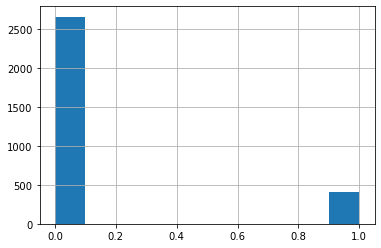

In [6]:
data.label.hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data.label):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [8]:
strat_train_set

,email,label,Subject,content
2302,"b""From rssfeeds@jmason.org Thu Oct 3 12:24:3...",0.0,vintag music archiv,url number hour radio station realaudio archiv...
682,b'From spamassassin-talk-admin@lists.sourcefor...,0.0,satalk compil error digit unix,hi i'm tri build sa digit unix numberf receiv ...
668,b'Return-Path: <Online#3.20502.53-KAuEgBlRpyKZ...,0.0,olympu brio dnumber number megapixel digit cam...,weekli nametopa header tabl widthnumb valignto...
1226,b'From fork-admin@xent.com Tue Sep 17 23:29:4...,0.0,slaughter name god,j justin mason jmjmasonorg write j tibetan bud...
1951,b'From rpm-list-admin@freshrpms.net Wed Aug 2...,0.0,homedud,hisom time follow messag haunt attempt mount e...
...,...,...,...,...
2737,b'From exelle@webinfo.fi Mon Sep 23 15:02:06 ...,1.0,home rep number comp hire,questiondo want differ jobdo want bossdo need ...
86,b'From sentto-2242572-55981-1034027969-zzzz=ex...,0.0,zzzzteana latest iraqrel news,headlin url bore y'all us republican reject ge...
1417,b'From fork-admin@xent.com Sun Sep 8 23:50:3...,0.0,whoa,number number gari lawrenc murphi wrote j want...
1114,"b""From rssfeeds@jmason.org Mon Sep 30 13:44:1...",0.0,linux softwar raid fun,url forgot write yesterday feel like forg blog...


In [9]:
strat_train_set.label.value_counts()

0.0    2127
1.0     323
Name: label, dtype: int64

In [10]:
label_pers = pd.DataFrame([data.label.value_counts()/len(data)])
label_pers = label_pers.T
num = 0
for d in [ strat_train_set, strat_test_set]:
    name = f"label {num}"
    label_pers[name] = d.label.value_counts()/len(d)
    num += 1
label_pers

,label,label 0,label 1
0.0,0.868103,0.868163,0.867863
1.0,0.131897,0.131837,0.132137


In [11]:
data = strat_train_set.copy()

In [12]:
data_labels = data.label.copy()
data = data.drop("label", axis=1)

In [13]:
data.head()

,email,Subject,content
2302,"b""From rssfeeds@jmason.org Thu Oct 3 12:24:3...",vintag music archiv,url number hour radio station realaudio archiv...
682,b'From spamassassin-talk-admin@lists.sourcefor...,satalk compil error digit unix,hi i'm tri build sa digit unix numberf receiv ...
668,b'Return-Path: <Online#3.20502.53-KAuEgBlRpyKZ...,olympu brio dnumber number megapixel digit cam...,weekli nametopa header tabl widthnumb valignto...
1226,b'From fork-admin@xent.com Tue Sep 17 23:29:4...,slaughter name god,j justin mason jmjmasonorg write j tibetan bud...
1951,b'From rpm-list-admin@freshrpms.net Wed Aug 2...,homedud,hisom time follow messag haunt attempt mount e...


In [14]:
data_labels.head()

2302    0.0
682     0.0
668     0.0
1226    0.0
1951    0.0
Name: label, dtype: float64

In [15]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1435 to 1351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   email    52 non-null     object
 1   Subject  4 non-null      object
 2   content  48 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [16]:
from sklearn.impute import SimpleImputer

simpleImputer = SimpleImputer(strategy="most_frequent")
simpleImputer.fit(data)

SimpleImputer(strategy='most_frequent')

In [17]:
X = simpleImputer.transform(data)
data_tr = pd.DataFrame(X, columns=data.columns)
data_tr.head(3)

,email,Subject,content
0,"b""From rssfeeds@jmason.org Thu Oct 3 12:24:3...",vintag music archiv,url number hour radio station realaudio archiv...
1,b'From spamassassin-talk-admin@lists.sourcefor...,satalk compil error digit unix,hi i'm tri build sa digit unix numberf receiv ...
2,b'Return-Path: <Online#3.20502.53-KAuEgBlRpyKZ...,olympu brio dnumber number megapixel digit cam...,weekli nametopa header tabl widthnumb valignto...


In [18]:
data_tr[data_tr.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   email    0 non-null      object
 1   Subject  0 non-null      object
 2   content  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [19]:
# data_labels[data_labels.isnull().any(axis=1)].info()

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
dirty_text = "He studies in the house yesterday, unluckily, the fans breaks down"
def word_stemmer(words):
    stem_words = [stemmer.stem(o) for o in words]
    return " ".join(stem_words)
def word_lemmatizer(words):
   lemma_words = [lemmatizer.lemmatize(o) for o in words]
   return " ".join(lemma_words)

In [21]:
clean_text = word_stemmer(dirty_text.split(" "))
clean_text

#Output
#'He studi in the hous yesterday, unluckily, the fan break down'

'he studi in the hous yesterday, unluckily, the fan break down'

In [22]:
clean_text2 = word_lemmatizer(dirty_text.split(" "))
clean_text2

#Output
#'I study in the house yesterday, unluckily, the fan break down'

'He study in the house yesterday, unluckily, the fan break down'